
# Introduction to Data Science (Project)

## Group Members

### M Shayan      211980038

### Alyan Ahmad 211980053

### Ayesha BiBi 211980004

### Mahnoor Aamir 211980063

### Zuria Tahir 211980052

# <center> Data PreProcessing

###### For Import Libraries

In [160]:
import pandas as pd

###### To Read the File

In [161]:
df = pd.read_csv("titanic_data.csv")

###### To Show DataSet

In [162]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###### Statistical Summary of dataset


In [164]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


######  Finding Unique Values of all column in the DataSet


In [165]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

###### Finding null values of all the columns in the dataset


In [166]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

######  Removing Null Values of Age column

In [167]:
removed_null = df.dropna()
age = removed_null["Age"]
age.mean()
mean=round(age.mean())
print(mean)

36


In [168]:
df["Age"].fillna(mean,inplace=True)

###### Removing Null Values of Emabrked Column


In [169]:
# We replaced Null values with S because there are 2 null calues and majority of entries are S
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [170]:
df["Embarked"].fillna("S",inplace=True)

###### Droping the cabin column beacuse there are 77% null values

In [171]:
df.drop(['Cabin'],axis=1,inplace=True)

In [172]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [173]:
# Combining SibSp and Parch into a single family column

df["Family"] = df["SibSp"] + df["Parch"]

In [174]:
# Now replacing SibSp and Parch 
df.drop(['SibSp','Parch'], axis = 1, inplace = True)

In [175]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,36.0,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,0


# <center> Data Visulization

###  Import Required Libraries For Visualization

In [264]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk


import matplotlib.pyplot as plt




In [265]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [266]:
df.shape

(891, 10)

In [267]:
# Check for duplicate entries
df.duplicated().sum()

0

<Axes: >

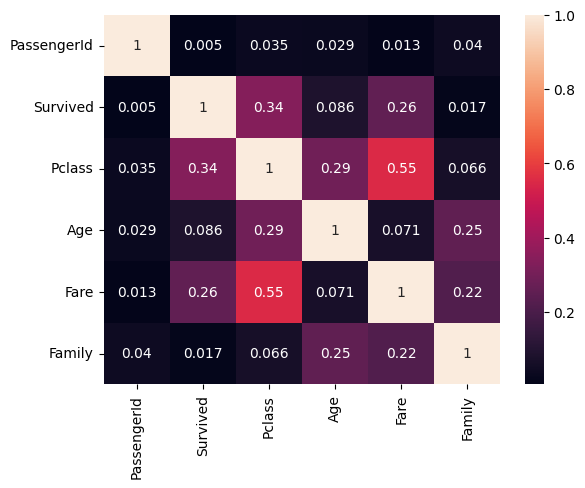

In [268]:
# Plotting the corelation between our Features using matplotlib's heatmap
plt.figure()
sns.heatmap(df.corr(numeric_only = True).abs(),annot=True)


In [269]:
#count the values in the Survived
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Count Of Survival')

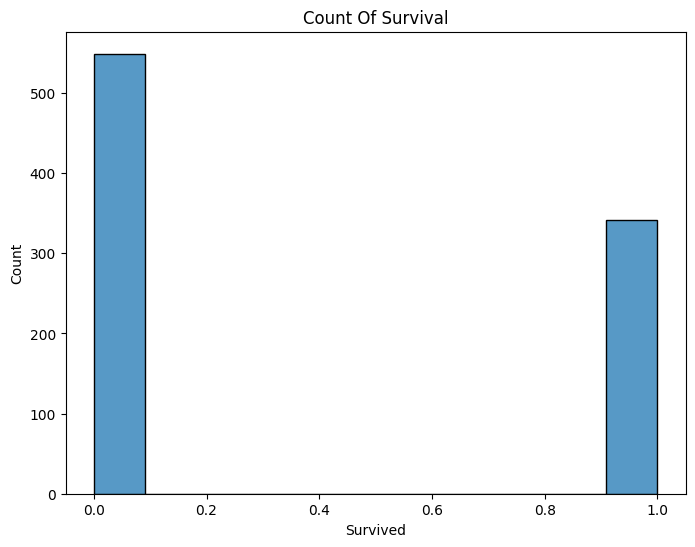

In [270]:
#plotting total people survived/not survived using histplot

plt.figure(figsize=(8,6))
sns.histplot(df.Survived)
plt.title('Count Of Survival')

In [271]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,36.0,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,0


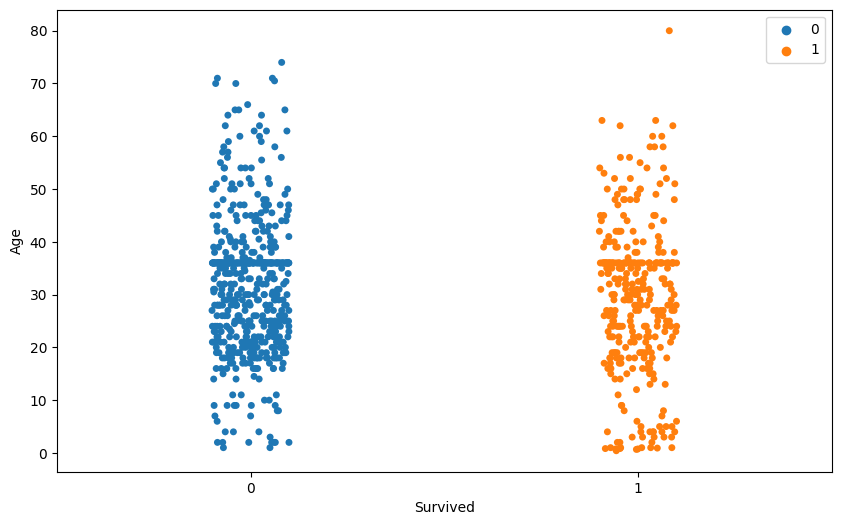

In [272]:
# The Data looks at a centrelized form because we remove the nulll values from the age column with the mean of the data
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Survived', y='Age', hue='Survived', jitter=True, )
plt.legend()
plt.show()

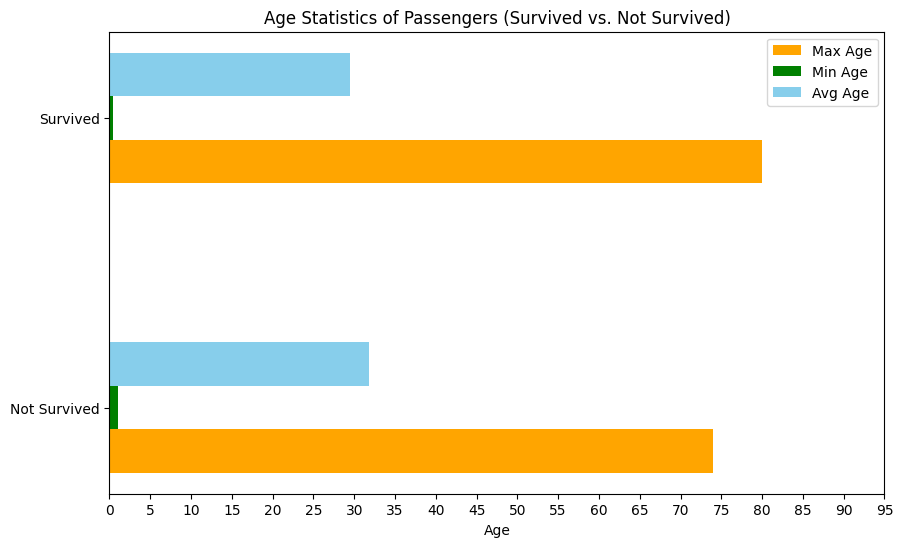

In [273]:
import matplotlib.pyplot as plt
import numpy as np



# Calculate statistics for passengers who did not survive
not_survived_stats = df[df['Survived'] == 0]['Age'].agg(['max', 'min', 'mean'])

# Calculate statistics for passengers who survived
survived_stats = df[df['Survived'] == 1]['Age'].agg(['max', 'min', 'mean'])


plt.figure(figsize=(10, 6))

categories = ['Not Survived', 'Survived']
positions = np.arange(len(categories))


bar_height = 0.15

# Create bars for maximum age
plt.barh(positions - bar_height, [not_survived_stats['max'], survived_stats['max']], height=bar_height, label='Max Age', color='orange')

# Create bars for minimum age
plt.barh(positions, [not_survived_stats['min'], survived_stats['min']], height=bar_height, label='Min Age', color='green')

# Create bars for average age
plt.barh(positions + bar_height, [not_survived_stats['mean'], survived_stats['mean']], height=bar_height, label='Avg Age', color='skyblue')


plt.yticks(positions, categories)
plt.xlabel('Age')
plt.title('Age Statistics of Passengers (Survived vs. Not Survived)')
plt.legend()


x_ticks = np.arange(0, 100, 5)  # Customize the interval and range as needed
plt.xticks(x_ticks)

plt.show()


In [274]:
#pclass count
pclass_count = df.groupby('Pclass')['Pclass'].count()
pclass_count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

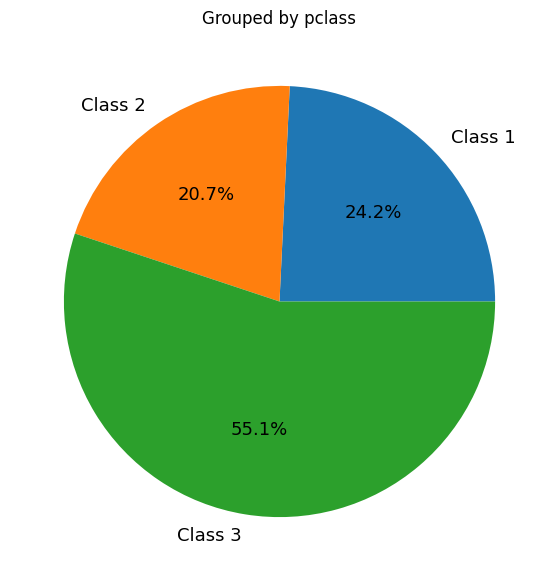

In [275]:
#Grouped by pclass, How many people in Class A, Class B , Class C 
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [276]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
sex_count = df.groupby('Sex')['Sex'].count()
sex_count

Sex
female    314
male      577
Name: Sex, dtype: int64

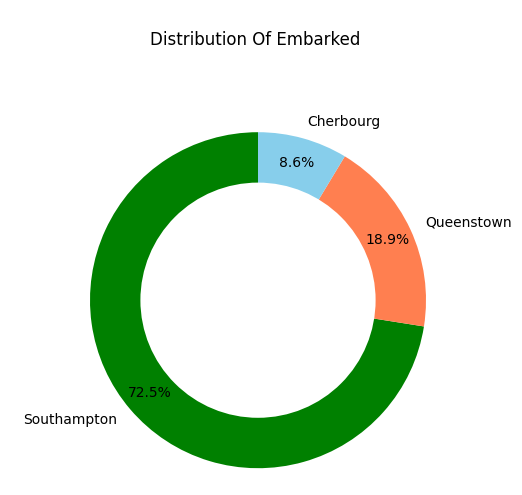

In [277]:
import matplotlib.pyplot as plt


embarked_counts = df['Embarked'].value_counts()


colors = ['green', 'coral', 'skyblue']


# Create a pie chart
fig, ax = plt.subplots()
ax.pie(embarked_counts, labels=['Southampton', 'Queenstown', 'Cherbourg'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Draw a white circle at the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

plt.title("\nDistribution Of Embarked \n\n\n")

plt.show()


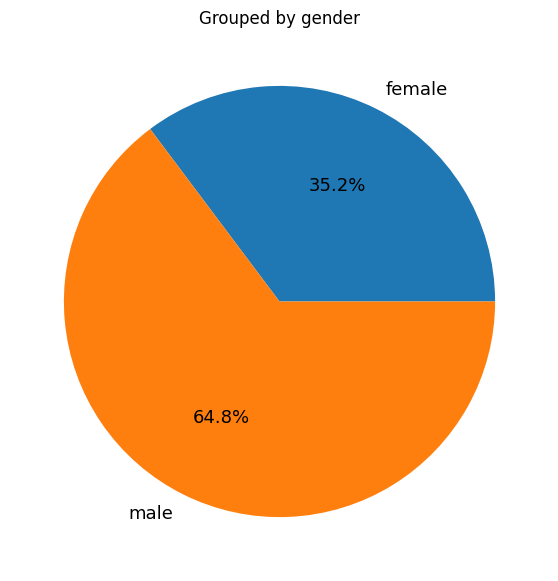

In [278]:
# Male: Female Percentage of the dataset
plt.figure(figsize=(7,7))
plt.title('Grouped by gender')
plt.pie(sex_count.values, labels=['female', 'male'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [279]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
embark_count = df.groupby('Embarked')['Embarked'].count()
embark_count

Embarked
C    168
Q     77
S    646
Name: Embarked, dtype: int64

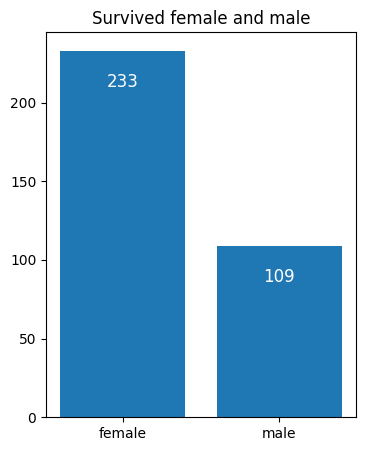

In [280]:
#Survivial number according to gender  i.e. Male and Female
survived_sex = df.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

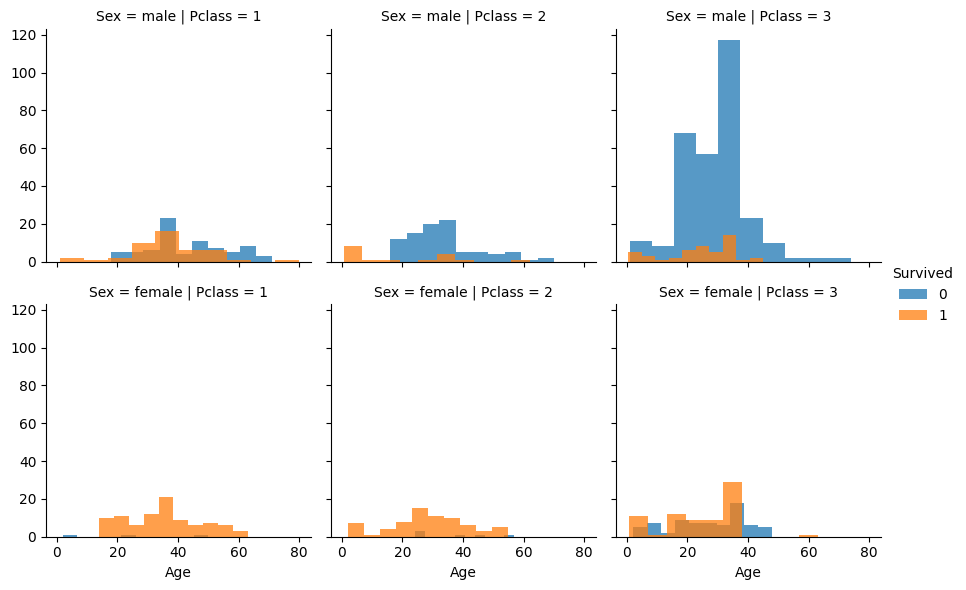

In [281]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(df, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()


<Axes: xlabel='Family', ylabel='count'>

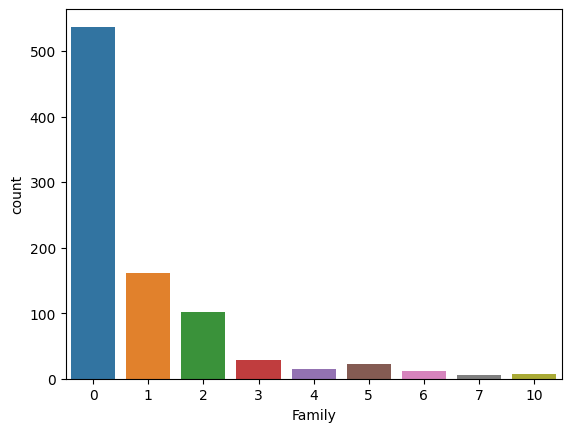

In [282]:
# How many people brought How many family members with them (excluding themselves)
sns.countplot(x='Family',data=df)

<Axes: ylabel='Frequency'>

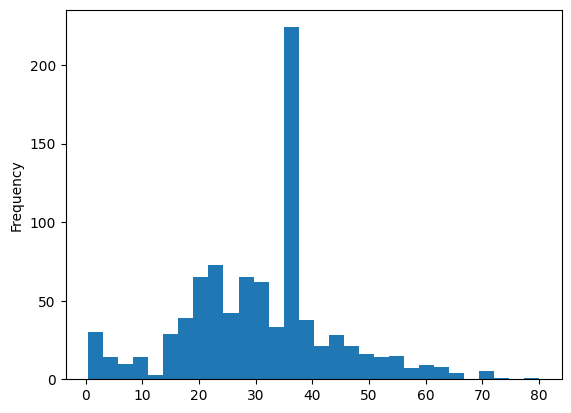

In [283]:
#Distribution Of Age in the dataset
df['Age'].dropna().plot.hist(bins=30)

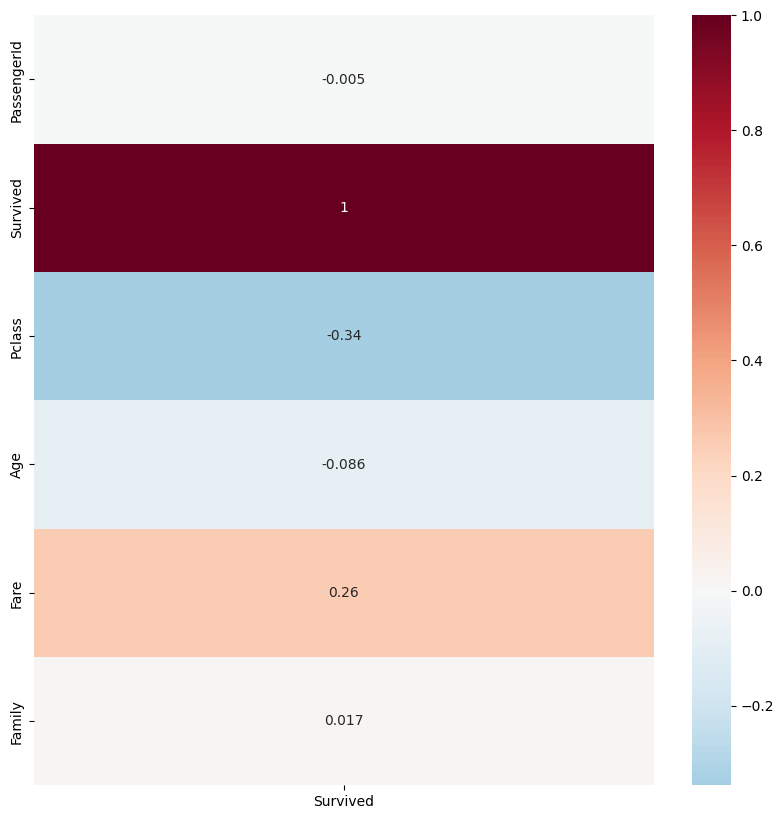

In [284]:
#The following heatmap shows the correlation of all variables with Survival
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True)[['Survived']],cmap="RdBu_r",center=0.0, annot=True);

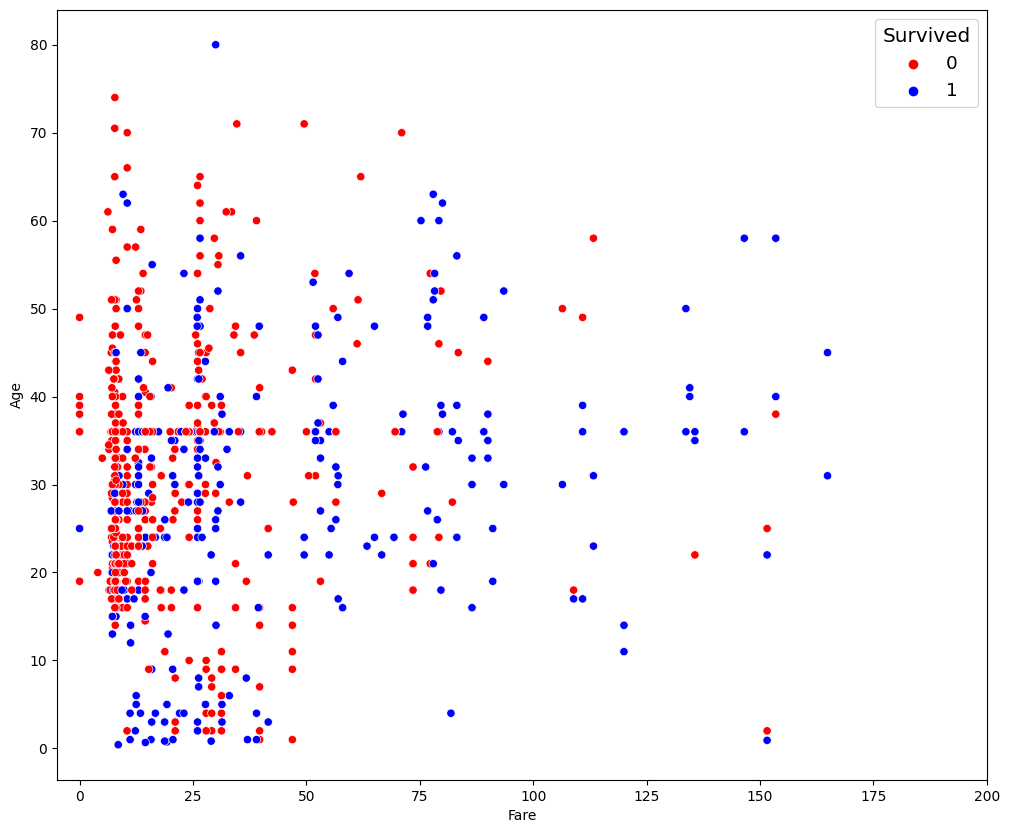

In [285]:
#Age and the Price of the whole dataset
fig, ax = plt.subplots(figsize=(12,10))
plt.xlim(-5,200)

with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.scatterplot(
        x='Fare',
        y='Age',
        hue='Survived',
        palette=['red','blue'],
        data=df,
        ax=ax
    )

# <center> Model Training </center>


### Importing Required Libraries


In [129]:
# for encoding
from sklearn.preprocessing import LabelEncoder

# for scalling
from sklearn.preprocessing import MinMaxScaler

#For test/train split
from sklearn.model_selection import train_test_split
# For KNN
from sklearn.neighbors import KNeighborsClassifier


### Encoding


In [130]:
label_encoder = LabelEncoder()
 #Chaning Non-numeric Columns into Numeric Columns

df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Ticket'] = label_encoder.fit_transform(df['Ticket'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Name'] = label_encoder.fit_transform(df['Name'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,108,1,22.0,523,7.2500,2,1
1,2,1,1,190,0,38.0,596,71.2833,0,1
2,3,1,3,353,0,26.0,669,7.9250,2,0
3,4,1,1,272,0,35.0,49,53.1000,2,1
4,5,0,3,15,1,35.0,472,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,101,13.0000,2,0
887,888,1,1,303,0,19.0,14,30.0000,2,0
888,889,0,3,413,0,36.0,675,23.4500,2,3
889,890,1,1,81,1,26.0,8,30.0000,0,0


In [131]:
df.corr(numeric_only = True)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.028772,-0.056554,0.012658,0.013128,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.086049,-0.164549,0.257307,-0.167675,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.292460,0.319869,-0.549500,0.162098,0.065997
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.089729,0.047348,-0.049173,-0.006117,-0.036309
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.093109,0.059372,-0.182333,0.108262,-0.200988
Age,0.028772,-0.086049,-0.292460,0.089729,0.093109,1.000000,-0.061660,0.070771,-0.055275,-0.253303
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.061660,1.000000,-0.013885,-0.001729,0.064302
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.070771,-0.013885,1.000000,-0.224719,0.217138
Embarked,0.013128,-0.167675,0.162098,-0.006117,0.108262,-0.055275,-0.001729,-0.224719,1.000000,0.066516
Family,-0.040143,0.016639,0.065997,-0.036309,-0.200988,-0.253303,0.064302,0.217138,0.066516,1.000000


In [132]:
# Dropping the Columns which are  not neccasry for model
df.drop(['PassengerId', 'Name', 'Family', 'Ticket'], axis=1, inplace=True)



In [133]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2
887,1,1,0,19.0,30.0000,2
888,0,3,0,36.0,23.4500,2
889,1,1,1,26.0,30.0000,0


### Scaling


In [134]:
# Some Machine Learning models such as KNN which calculate distance needs value
# to be at a similar scale so we scale our features.

target = df["Survived"]

labels = df.drop("Survived" , axis = 1) 

scaler = MinMaxScaler()
labels_scaled = scaler.fit_transform(labels)



### Test / Train Spliting


In [135]:
X_train, X_test, y_train, y_test = train_test_split(labels_scaled, target, test_size=0.2, random_state=42)

### Finding The Right Value Of K

In [136]:
k_values = []
for i in range(1,30):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy = 100 * sum(y_test == pred)/y_test.shape[0]
    k_values.append(round(accuracy, 0))
          
          

j = 1
for i in k_values:
    print(j,"=",i)
    j = j + 1

    # So the value of k will be 11

1 = 74.0
2 = 79.0
3 = 79.0
4 = 78.0
5 = 79.0
6 = 77.0
7 = 75.0
8 = 80.0
9 = 81.0
10 = 80.0
11 = 81.0
12 = 80.0
13 = 80.0
14 = 79.0
15 = 79.0
16 = 79.0
17 = 79.0
18 = 79.0
19 = 79.0
20 = 79.0
21 = 79.0
22 = 79.0
23 = 79.0
24 = 79.0
25 = 79.0
26 = 79.0
27 = 80.0
28 = 80.0
29 = 80.0


### Applying KNN at K = 11 with the accuracy of 81

In [137]:
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(X_train, y_train)
pred = knn_classifier.predict(X_test)

### Model Evaluation

In [138]:
from sklearn.metrics import confusion_matrix, f1_score

conf_matrix = confusion_matrix(y_test, pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the F1 score
f1 = f1_score(y_test, pred)

# Display the F1 score
print("F1 Score:", f1)

Confusion Matrix:
[[95 10]
 [24 50]]
F1 Score: 0.746268656716418
